In [2]:
import pandas as pd

In [3]:
vaccine = pd.read_csv("../data/USA/vaccine_vaccination/usa_vaccine.csv")
vaccine.drop(columns = "Unnamed: 0", inplace = True)
vaccine

,Text
0,"In other words, the government is falsifying t..."
1,@Noahpinion And Mounk is too conservative to g...
2,@WithoutReports @itsYourGrace @DJTTracker That...
3,Poor Pat still doesn’t get that Trump trusted ...
4,@IgorForHire @RepThomasMassie Sure. But then y...
...,...
19996,Read &amp; send out to others....this should b...
19997,Sudden Infant Death Syndrome code for vaccine-...
19998,@EclecticRadical Imagine thinking vaccines are...
19999,@monty_teaches @benshapiro None of that ended ...


In [5]:
vaccination = pd.read_csv("../data/USA/vaccine_vaccination/usa_vaccination.csv")
vaccination.drop(columns = "Unnamed: 0", inplace = True)
vaccination

,Text
0,Want to find a way to end racism? Try to force...
1,"This child almost died from tetanus, spent mon..."
2,@MichelLeblanc20 @melaniejoly @JustinTrudeau J...
3,@badamw @oc_mercuri @JKLustenberger @ShannonSk...
4,@sunqueentrg Depends whether the vaccination s...
...,...
19996,@RobRobbEdwards I want to VOMIT!!
19997,@Marg73791258 They did not mention the vaccina...
19998,'I can’t tolerate desecration of any war memor...
19999,@sarahsk36194882 @Rimo82945023 @jamft @Geopol2...


In [6]:
frames = [vaccination, vaccine]

result = pd.concat(frames)

In [7]:
result

,Text
0,Want to find a way to end racism? Try to force...
1,"This child almost died from tetanus, spent mon..."
2,@MichelLeblanc20 @melaniejoly @JustinTrudeau J...
3,@badamw @oc_mercuri @JKLustenberger @ShannonSk...
4,@sunqueentrg Depends whether the vaccination s...
...,...
19996,Read &amp; send out to others....this should b...
19997,Sudden Infant Death Syndrome code for vaccine-...
19998,@EclecticRadical Imagine thinking vaccines are...
19999,@monty_teaches @benshapiro None of that ended ...


In [8]:
tweet_text_list = result['Text'].tolist()

tweet_text_list

['Want to find a way to end racism? Try to force people to inject themselves. That’s what I see!\nA bunch of people of all races standing up against forced vaccination. Not against vaxx.Some people need these vaxx &amp; I support those people getting their shot. I draw the line at force https://t.co/lGbiJvbucO',
 'This child almost died from tetanus, spent months in the hospital at a cost of around $1M, and his parents still refused vaccination after. And this was pre-pandemic.  https://t.co/Le6v9zPIqY https://t.co/qCOmIWjHaG',
 '@MichelLeblanc20 @melaniejoly @JustinTrudeau Juste se rappeler M. Leblanc la pression que les PM provinciaux et le monde d’affaires le demandait pour pouvoir ré-ouvrir les frontières 😉 le trafic aérien. +les Gouv Provinciaux, Qc inclus vont-ils bloqués les touristes qui n’auront pas de pass-vaccination à l’hôtel? Au resto',
 '@badamw @oc_mercuri @JKLustenberger @ShannonSkalos You would expect cases to rise significantly, of course, vaccination rates come into 

In [9]:
unique_list = list( dict.fromkeys(tweet_text_list) )
print(len(unique_list))

39318


In [10]:
import numpy as np
import re

In [11]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "vaccine", "covid", "vaccines","vaccinated","vaccination", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [13]:
cleaned_tweets = [clean_tweet(tw) for tw in unique_list]
cleaned_tweets

<ipython-input-11-92847b5be53e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['want find way end racism try force people inject themselves that s what i see bunch people all races standing up against forced not against vaxx some people need these vaxx i support those people getting their shot i draw line at force',
 'this child almost died tetanus spent months hospital at cost around 1m his parents still refused after this was pre pandemic',
 'juste se rappeler m leblanc la pression que les provinciaux et le monde d affaires le demandait pour pouvoir r ouvrir les fronti res le trafic rien les gouv provinciaux qc inclus vont ils bloqu s les touristes qui n auront pas de pass l h tel au resto',
 'you would expect cases rise significantly course rates come into play as does space we as adults are not usually confined single space with as many people as school age students data states that have lifted vs those that have not bears this out',
 'depends whether status is embedded qr code itself or if code is just link that connects back end i read about it when it was

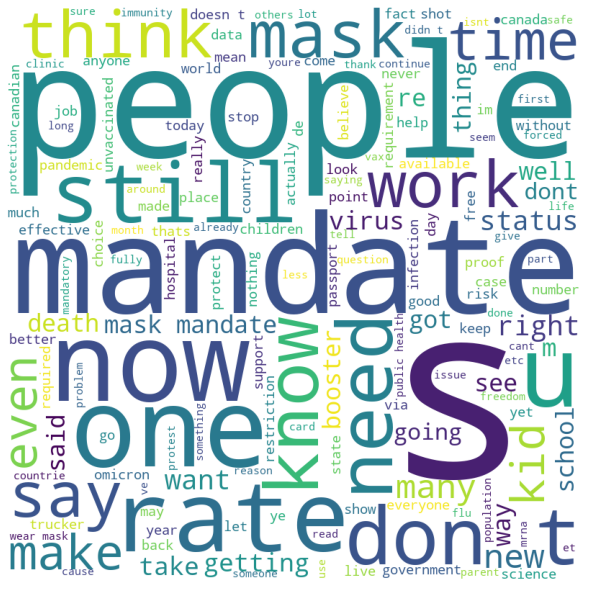

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()